<a href="https://colab.research.google.com/github/AdnanHajwani12/Todo-React-Testing/blob/main/Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unit Testing**

In [ ]:
const mongoose = require("mongoose");
const Todo = require("../../models/todoModel");

beforeAll(async () => {
  await mongoose.connect(process.env.MONGO_URL);
});

afterAll(async () => {
  await mongoose.connection.dropDatabase();
  await mongoose.connection.close();
});

describe("Todo Model Test", () => {
  it("should create & save a todo successfully", async () => {
    const todo = new Todo({ title: "Test Todo" });
    const savedTodo = await todo.save();

    expect(savedTodo._id).toBeDefined();
    expect(savedTodo.title).toBe("Test Todo");
    expect(savedTodo.completed).toBe(false);
  });

  it("should fail if title is missing", async () => {
    const todoWithoutTitle = new Todo({});
    let err;
    try {
      await todoWithoutTitle.save();
    } catch (error) {
      err = error;
    }
    expect(err).toBeInstanceOf(mongoose.Error.ValidationError);
    expect(err.errors.title).toBeDefined();
  });
});


# **Integration Testing**

In [ ]:
jest.setTimeout(60000);

const request = require('supertest');
const mongoose = require('mongoose');
const { MongoMemoryServer } = require('mongodb-memory-server');
const app = require('../../app');
const Todo = require('../../models/todoModel');

let mongoServer;

beforeAll(async () => {
  mongoServer = await MongoMemoryServer.create();
  const uri = mongoServer.getUri();
  await mongoose.connect(uri);
});

afterAll(async () => {
  await mongoose.disconnect();
  await mongoServer.stop();
});

describe('Todo Routes - Integration Tests', () => {
  test('POST /add-todo should add a new todo', async () => {
    const res = await request(app)
      .post('/add-todo')
      .send({ title: 'Integration Test Todo' });

    expect(res.status).toBe(201);
    expect(res.body.todo.title).toBe('Integration Test Todo');
  });

  test('GET /get-todo should return all todos', async () => {
    await Todo.create({ title: 'Sample Todo' });

    const res = await request(app).get('/get-todo');
    expect(res.status).toBe(200);
    expect(res.body.length).toBeGreaterThan(0);
  });
});


## **E2E**

In [ ]:
jest.setTimeout(60000); // 60 seconds

const request = require('supertest');
const app = require('../../app');
const mongoose = require('mongoose');
const { MongoMemoryServer } = require('mongodb-memory-server');

let mongoServer;

beforeAll(async () => {
  mongoServer = await MongoMemoryServer.create();
  const uri = mongoServer.getUri();
  await mongoose.connect(uri);
});

afterAll(async () => {
  await mongoose.disconnect();
  if (mongoServer) {
    await mongoServer.stop();
  }
});


describe('E2E - Todo App', () => {
  test('should verify API health', async () => {
    const res = await request(app).get('/');
    expect(res.status).toBe(200);
    expect(res.body.message).toMatch(/Todo backend is running/i);
  });

  test('should create and fetch todos end-to-end', async () => {
    await request(app).post('/add-todo').send({ title: 'E2E Todo' });

    const res = await request(app).get('/get-todo');
    expect(res.status).toBe(200);
    expect(res.body.some(t => t.title === 'E2E Todo')).toBe(true);
  });
});


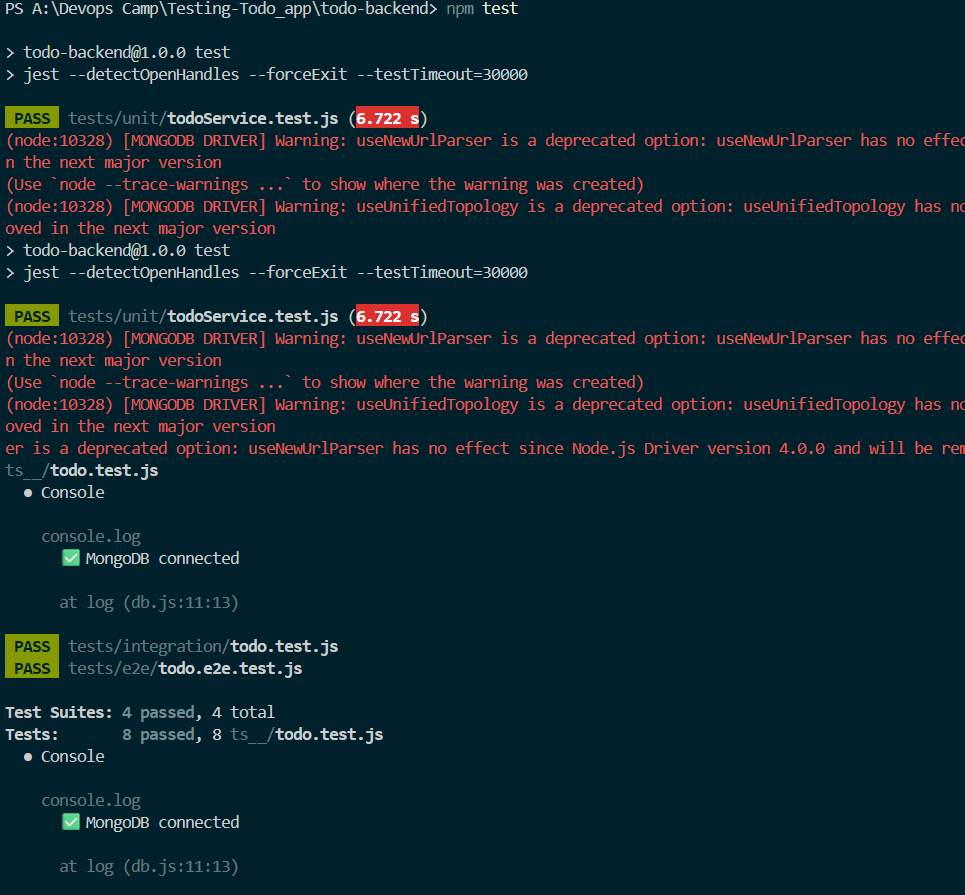

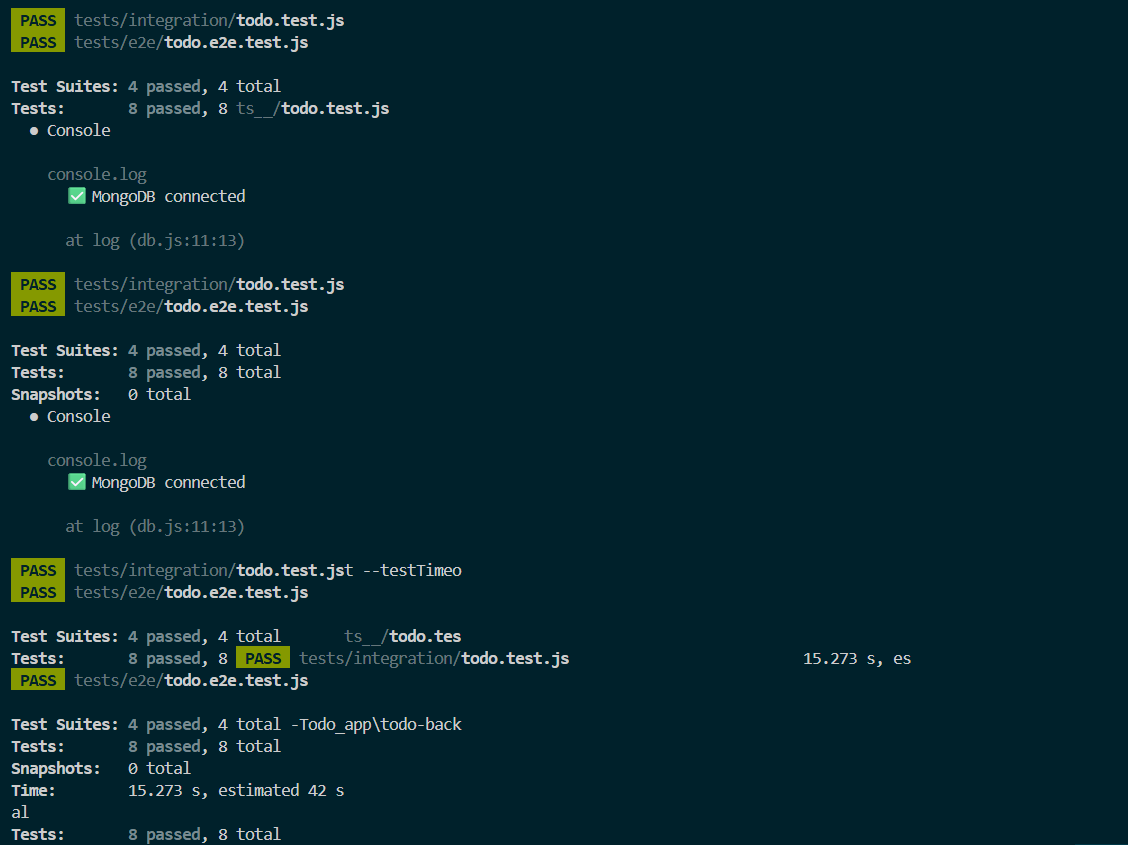

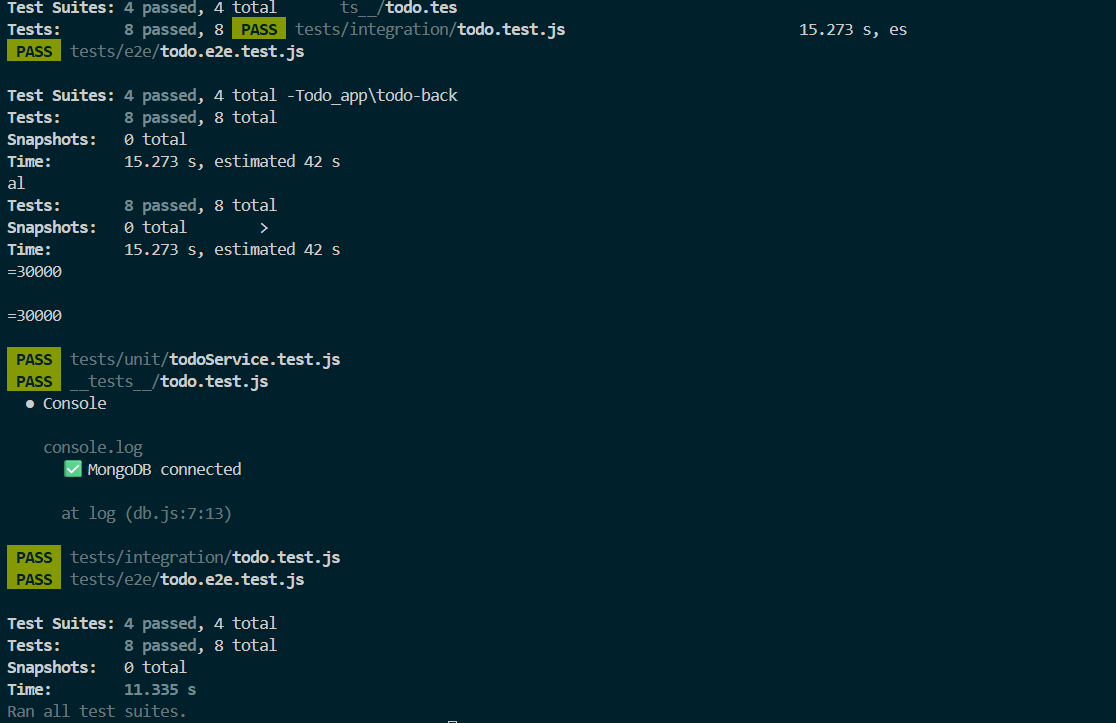